In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lmfit.models import GaussianModel, LinearModel, ExponentialModel, Model

In [142]:
%matplotlib notebook

# Kalibrierung

In [2]:
untergrund = pd.read_csv("Messdaten/kalibrierung/kallibrierung_untergrund.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
am = pd.read_csv("Messdaten/kalibrierung/kallibrierung_Am.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
ba = pd.read_csv("Messdaten/kalibrierung/kallibrierung_Ba.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
cs = pd.read_csv("Messdaten/kalibrierung/kallibrierung_Cs.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)

In [3]:
x = np.arange(0,2048)

In [4]:
plt.errorbar(x,untergrund.rate,yerr=untergrund.error, fmt=' .g')
plt.xlim([0,2050])
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [5]:
plt.plot(am.rate-untergrund.rate, ' .', label="Messdaten")
plt.legend(loc="best")
plt.show()

In [6]:
plt.plot(ba.rate-untergrund.rate, ' .')
plt.show()

In [7]:
plt.plot(cs.rate-untergrund.rate, ' .')
plt.show()

## Fit der Am Daten

In [8]:
x = np.arange(0,2048)

In [9]:
gauss_0 = GaussianModel(prefix="gauss_0_")
gauss_1 = GaussianModel(prefix="gauss_1_")
gauss_2 = GaussianModel(prefix="gauss_2_")
gauss_3 = GaussianModel(prefix="gauss_3_")
gauss_4 = GaussianModel(prefix="gauss_4_")
gauss_5 = GaussianModel(prefix="gauss_5_")
gauss_6 = GaussianModel(prefix="gauss_6_")

In [10]:
pars_am_1 = gauss_1.guess(am.rate,x=x)
pars_am_1.update(gauss_2.make_params())
pars_am_1.update(gauss_3.make_params())
pars_am_1.update(gauss_4.make_params())
pars_am_1.update(gauss_0.make_params())
pars_am_2 = gauss_5.guess(am.rate,x=x)
pars_am_2.update(gauss_6.make_params())

In [11]:
# controll the center
pars_am_1['gauss_0_center'].set(50, min=48, max=52)
pars_am_1['gauss_1_center'].set(65, min=63, max=68)
pars_am_1['gauss_2_center'].set(77, min=74, max=80)
pars_am_1['gauss_3_center'].set(98, min=95, max=101)
pars_am_1['gauss_4_center'].set(111, min=108, max=114)
pars_am_2['gauss_5_center'].set(181, min=178, max=184)
pars_am_2['gauss_6_center'].set(213, min=207, max=219)
# controll the amplitude
pars_am_1['gauss_0_amplitude'].set(130*13)#, min=48, max=52)
pars_am_1['gauss_1_amplitude'].set(440*13)#, min=430*2.5, max=440*2.5)
pars_am_1['gauss_2_amplitude'].set(300*13)#, min=290*2.5, max=310*2.5)
pars_am_1['gauss_3_amplitude'].set(310*13)#, min=300*2.5, max=320*2.5)
pars_am_1['gauss_4_amplitude'].set(380*13)#, min=370*2.5, max=390*2.5)
pars_am_2['gauss_5_amplitude'].set(500*13)#, min=490*2.5, max=510*2.5)
pars_am_2['gauss_6_amplitude'].set(2500*13)#, min=2400*2.5, max=2600*2.5)
# controll sigma
pars_am_1['gauss_0_sigma'].set(1, min=0, max=5)
pars_am_1['gauss_1_sigma'].set(5, min=1, max=68)
pars_am_1['gauss_2_sigma'].set(5, min=1, max=80)
pars_am_1['gauss_3_sigma'].set(5, min=1, max=101)
pars_am_1['gauss_4_sigma'].set(5, min=1, max=114)
pars_am_2['gauss_5_sigma'].set(5, min=1, max=184)
pars_am_2['gauss_6_sigma'].set(5, min=1, max=219)

In [12]:
mod_gauss_am_1 = gauss_1 + gauss_2 + gauss_3 + gauss_4 + gauss_0

In [13]:
out_gauss_am_1 = mod_gauss_am_1.fit(am.rate[40:130]-untergrund.rate[40:130],x=x[40:130],params=pars_am_1,weights=1/(am.error[40:130]))

In [14]:
plt.errorbar(x,am.rate-untergrund.rate, yerr=am.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_gauss_am_1.eval(x=np.arange(0,2048)), '-r', label="Fit")
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [15]:
print(out_gauss_am_1.fit_report())

[[Model]]
    ((((Model(gaussian, prefix='gauss_1_') + Model(gaussian, prefix='gauss_2_')) + Model(gaussian, prefix='gauss_3_')) + Model(gaussian, prefix='gauss_4_')) + Model(gaussian, prefix='gauss_0_'))
[[Fit Statistics]]
    # function evals   = 217
    # data points      = 90
    # variables        = 15
    chi-square         = 86.581
    reduced chi-square = 1.154
[[Variables]]
    gauss_1_sigma:       4.84841741 +/- 0.444386 (9.17%) (init= 5)
    gauss_1_fwhm:        11.4171503 +/- 1.046449 (9.17%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   4871.27197 +/- 649.3118 (13.33%) (init= 5720)
    gauss_1_center:      64.5491642 +/- 0.452546 (0.70%) (init= 65)
    gauss_2_sigma:       5.50873396 +/- 0.729345 (13.24%) (init= 5)
    gauss_2_fwhm:        12.9720769 +/- 1.717476 (13.24%)  == '2.3548200*gauss_2_sigma'
    gauss_2_amplitude:   3939.85268 +/- 652.0434 (16.55%) (init= 3900)
    gauss_2_center:      77.2652558 +/- 0.717123 (0.93%) (init= 77)
    gauss_3_sigma:       5

In [16]:
mod_gauss_am_2 = gauss_5 + gauss_6

In [17]:
out_gauss_am_2 = mod_gauss_am_2.fit(am.rate[165:240]-untergrund.rate[165:240],x=x[165:240],params=pars_am_2,weights=1/am.error[165:240])

In [18]:
plt.errorbar(x,am.rate-untergrund.rate, yerr=am.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_gauss_am_2.eval(x=x), '-r', label="Fit")
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [19]:
print(out_gauss_am_2.fit_report())

[[Model]]
    (Model(gaussian, prefix='gauss_5_') + Model(gaussian, prefix='gauss_6_'))
[[Fit Statistics]]
    # function evals   = 102
    # data points      = 75
    # variables        = 6
    chi-square         = 115.754
    reduced chi-square = 1.678
[[Variables]]
    gauss_5_sigma:       13.6749687 +/- 0.579408 (4.24%) (init= 5)
    gauss_5_fwhm:        32.2020899 +/- 1.364401 (4.24%)  == '2.3548200*gauss_5_sigma'
    gauss_5_amplitude:   16761.1622 +/- 654.0406 (3.90%) (init= 6500)
    gauss_5_center:      184        +/- 5.647167 (3.07%) (init= 181)
    gauss_6_sigma:       8.56075037 +/- 0.067322 (0.79%) (init= 5)
    gauss_6_fwhm:        20.1590261 +/- 0.158533 (0.79%)  == '2.3548200*gauss_6_sigma'
    gauss_6_amplitude:   52316.5087 +/- 604.2185 (1.15%) (init= 32500)
    gauss_6_center:      213.627553 +/- 0.100067 (0.05%) (init= 213)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_5_sigma, gauss_5_amplitude)  =  0.926 
    C(gauss_5_amplitude, gauss_5_cent

## Fit der Ba Daten

In [20]:
gauss_0 = GaussianModel(prefix="gauss_0_")
gauss_1 = GaussianModel(prefix="gauss_1_")
gauss_2 = GaussianModel(prefix="gauss_2_")
gauss_3 = GaussianModel(prefix="gauss_3_")
gauss_4 = GaussianModel(prefix="gauss_4_")
gauss_5 = GaussianModel(prefix="gauss_5_")
gauss_6 = GaussianModel(prefix="gauss_6_")

In [21]:
pars_ba_1 = gauss_1.guess(ba.rate,x=x)
pars_ba_2 = gauss_2.guess(ba.rate,x=x)
pars_ba_2.update(gauss_0.make_params())
pars_ba_3 = gauss_3.guess(ba.rate,x=x)
pars_ba_3.update(gauss_4.make_params())
pars_ba_4 = gauss_5.guess(ba.rate,x=x)

In [22]:
# controll the center
pars_ba_1['gauss_1_center'].set(20, min=10, max=25)
pars_ba_2['gauss_2_center'].set(112, min=100, max=120)
pars_ba_2['gauss_0_center'].set(125, min=120, max=130)
pars_ba_3['gauss_3_center'].set(228, min=210, max=235)
pars_ba_3['gauss_4_center'].set(286, min=270, max=300)
pars_ba_4['gauss_5_center'].set(1182, min=1150, max=1200)
# controll the amplitude
pars_ba_1['gauss_1_amplitude'].set(440*13, min=0)#, max=440*2.5)
pars_ba_2['gauss_2_amplitude'].set(300, min=0)#, max=310*2.5)
pars_ba_2['gauss_0_amplitude'].set(125, min=0)#, max=130)
pars_ba_3['gauss_3_amplitude'].set(310*13, min=0)#, max=320*2.5)
pars_ba_3['gauss_4_amplitude'].set(380*13, min=0)#, max=390*2.5)
pars_ba_4['gauss_5_amplitude'].set(500*13, min=0)#, max=510*2.5)
# controll sigma
pars_ba_1['gauss_1_sigma'].set(5, min=1, max=68)
pars_ba_2['gauss_2_sigma'].set(5, min=1, max=80)
pars_ba_3['gauss_3_sigma'].set(5, min=1, max=101)
pars_ba_3['gauss_4_sigma'].set(5, min=1, max=114)
pars_ba_4['gauss_5_sigma'].set(5, min=1, max=184)

In [23]:
mod_ba_1 = gauss_1
out_ba_1 = mod_ba_1.fit(ba.rate[15:25]-untergrund.rate[15:25],params=pars_ba_1,x=x[15:25],weights=1/ba.error[15:25])

In [24]:
plt.errorbar(x,ba.rate-untergrund.rate, yerr=ba.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_ba_1.eval(x=x), '-r', label="Fit")
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [25]:
print(out_ba_1.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 10
    # variables        = 3
    chi-square         = 7.968
    reduced chi-square = 1.138
[[Variables]]
    gauss_1_sigma:       3.71202384 +/- 0.281089 (7.57%) (init= 5)
    gauss_1_fwhm:        8.74114799 +/- 0.661916 (7.57%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   1117.53081 +/- 61.21242 (5.48%) (init= 5720)
    gauss_1_center:      19.1213070 +/- 0.201517 (1.05%) (init= 20)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_amplitude)  =  0.751 
    C(gauss_1_sigma, gauss_1_center)  = -0.209 
    C(gauss_1_amplitude, gauss_1_center)  = -0.204 



In [26]:
mod_ba_2 = gauss_2 + gauss_0
out_ba_2 = mod_ba_2.fit(ba.rate[95:135]-untergrund.rate[95:135],params=pars_ba_2,x=x[95:135],weights=1/ba.error[95:135])

In [27]:
plt.errorbar(x,ba.rate-untergrund.rate, yerr=ba.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_ba_2.eval(x=x), '-r', label="Fit")
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [28]:
print(out_ba_2.fit_report())

[[Model]]
    (Model(gaussian, prefix='gauss_2_') + Model(gaussian, prefix='gauss_0_'))
[[Fit Statistics]]
    # function evals   = 134
    # data points      = 40
    # variables        = 6
    chi-square         = 80.259
    reduced chi-square = 2.361
[[Variables]]
    gauss_2_sigma:       6.78656645 +/- 0.105521 (1.55%) (init= 5)
    gauss_2_fwhm:        15.9811424 +/- 0.248484 (1.55%)  == '2.3548200*gauss_2_sigma'
    gauss_2_amplitude:   26863.5431 +/- 382.4157 (1.42%) (init= 300)
    gauss_2_center:      111.053940 +/- 0.126139 (0.11%) (init= 112)
    gauss_0_sigma:       4.59849759 +/- 0.499772 (10.87%) (init= 1)
    gauss_0_fwhm:        10.8286341 +/- 1.176874 (10.87%)  == '2.3548200*gauss_0_sigma'
    gauss_0_amplitude:   2615.75185 +/- 323.1190 (12.35%) (init= 125)
    gauss_0_center:      128.025143 +/- 0.499981 (0.39%) (init= 125)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_0_sigma, gauss_0_amplitude)  =  0.864 
    C(gauss_0_amplitude, gauss_0_cente

In [29]:
mod_ba_3 = gauss_3 + gauss_4
out_ba_3 = mod_ba_3.fit(ba.rate[204:315]-untergrund.rate[204:315],params=pars_ba_3,x=x[204:315],weights=1/ba.error[204:315])

In [30]:
plt.errorbar(x,ba.rate-untergrund.rate, yerr=ba.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_ba_3.eval(x=x), '-r', label="Fit")
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [31]:
print(out_ba_3.fit_report())

[[Model]]
    (Model(gaussian, prefix='gauss_3_') + Model(gaussian, prefix='gauss_4_'))
[[Fit Statistics]]
    # function evals   = 79
    # data points      = 111
    # variables        = 6
    chi-square         = 186.847
    reduced chi-square = 1.779
[[Variables]]
    gauss_3_sigma:       29.2420708 +/- 3.553440 (12.15%) (init= 5)
    gauss_3_fwhm:        68.8598133 +/- 8.367712 (12.15%)  == '2.3548200*gauss_3_sigma'
    gauss_3_amplitude:   7263.68065 +/- 781.6782 (10.76%) (init= 4030)
    gauss_3_center:      234.999999 +/- 5.363476 (2.28%) (init= 228)
    gauss_4_sigma:       12.5318055 +/- 0.343834 (2.74%) (init= 5)
    gauss_4_fwhm:        29.5101462 +/- 0.809668 (2.74%)  == '2.3548200*gauss_4_sigma'
    gauss_4_amplitude:   11357.4608 +/- 560.8174 (4.94%) (init= 4940)
    gauss_4_center:      284.429428 +/- 0.300680 (0.11%) (init= 286)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_3_sigma, gauss_3_amplitude)  =  0.971 
    C(gauss_3_amplitude, gauss_4_am

In [32]:
mod_ba_4 = gauss_5
out_ba_4 = mod_ba_4.fit(ba.rate[1100:1250],params=pars_ba_4,x=x[1100:1250],weights=1/ba.error[1100:1250])

In [33]:
plt.errorbar(x,ba.rate-untergrund.rate, yerr=ba.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_ba_4.eval(x=x), '-r', label="Fit")
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [34]:
print(out_ba_4.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_5_')
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 150
    # variables        = 3
    chi-square         = 117.888
    reduced chi-square = 0.802
[[Variables]]
    gauss_5_sigma:       43.3949452 +/- 0.494619 (1.14%) (init= 5)
    gauss_5_fwhm:        102.187285 +/- 1.164740 (1.14%)  == '2.3548200*gauss_5_sigma'
    gauss_5_amplitude:   12789.9828 +/- 117.5778 (0.92%) (init= 6500)
    gauss_5_center:      1180.46864 +/- 0.450395 (0.04%) (init= 1182)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_5_sigma, gauss_5_amplitude)  =  0.430 
    C(gauss_5_sigma, gauss_5_center)  =  0.180 
    C(gauss_5_amplitude, gauss_5_center)  =  0.128 



## Kilibrierung der Cs Daten

In [35]:
gauss_0 = GaussianModel(prefix="gauss_0_")
gauss_1 = GaussianModel(prefix="gauss_1_")
gauss_2 = GaussianModel(prefix="gauss_2_")

In [36]:
pars_cs_1 = gauss_0.guess(cs.rate,x=x)
pars_cs_2 = gauss_1.guess(cs.rate,x=x)
pars_cs_3 = gauss_2.guess(cs.rate,x=x)

In [37]:
# controll the center
pars_cs_1['gauss_0_center'].set(115, min=110, max=120)
pars_cs_2['gauss_1_center'].set(267, min=263, max=270)
pars_cs_3['gauss_2_center'].set(1920, min=1900, max=1940)
# controll the amplitude
pars_cs_1['gauss_0_amplitude'].set(125, min=0)#, max=130)
pars_cs_2['gauss_1_amplitude'].set(440*13, min=0)#, max=440*2.5)
pars_cs_3['gauss_2_amplitude'].set(300, min=0)#, max=310*2.5)
# controll sigma
pars_cs_1['gauss_0_sigma'].set(5, min=1, max=68)
pars_cs_2['gauss_1_sigma'].set(5, min=1, max=68)
pars_cs_3['gauss_2_sigma'].set(5, min=1, max=80)

In [38]:
mod_cs_1 = gauss_0
out_cs_1 = mod_cs_1.fit(cs.rate[100:130],params=pars_cs_1,x=x[100:130],weights=1/cs.error[100:130])

In [39]:
plt.errorbar(x,cs.rate-untergrund.rate, yerr=cs.error, fmt=' .g')
plt.plot(x,out_cs_1.eval(x=x), '-r')
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [40]:
print(out_cs_1.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_0_')
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 30
    # variables        = 3
    chi-square         = 36.299
    reduced chi-square = 1.344
[[Variables]]
    gauss_0_sigma:       8.33786026 +/- 0.166957 (2.00%) (init= 5)
    gauss_0_fwhm:        19.6341601 +/- 0.393154 (2.00%)  == '2.3548200*gauss_0_sigma'
    gauss_0_amplitude:   6336.70331 +/- 103.7750 (1.64%) (init= 125)
    gauss_0_center:      115.366805 +/- 0.153160 (0.13%) (init= 115)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_0_sigma, gauss_0_amplitude)  =  0.381 
    C(gauss_0_sigma, gauss_0_center)  =  0.137 



In [41]:
mod_cs_3 = gauss_2
out_cs_3 = mod_cs_3.fit(cs.rate[1860:1980],params=pars_cs_3,x=x[1860:1980],weights=1/cs.error[1860:1980])

In [42]:
plt.errorbar(x,cs.rate-untergrund.rate, yerr=cs.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_cs_3.eval(x=x), '-r', label="Fit")
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [43]:
print(out_cs_3.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_2_')
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 120
    # variables        = 3
    chi-square         = 170.233
    reduced chi-square = 1.455
[[Variables]]
    gauss_2_sigma:       23.0352370 +/- 0.152370 (0.66%) (init= 5)
    gauss_2_fwhm:        54.2438368 +/- 0.358805 (0.66%)  == '2.3548200*gauss_2_sigma'
    gauss_2_amplitude:   23839.7666 +/- 187.4390 (0.79%) (init= 300)
    gauss_2_center:      1920.26351 +/- 0.187739 (0.01%) (init= 1920)
[[Correlations]] (unreported correlations are <  0.100)



In [44]:
energien = np.array([14,33,60,31,81,383,32,662])
kanal = np.array([64.5491642,112.029958,213.627553,111.053940,284.659378,1180.46864,115.366805,1920.26351])
kanal_err = np.array([4.84841741,6.34840458,8.56075037,6.78656645,12.5318055,43.3949452,8.33786026,23.0352370])

In [45]:
plt.errorbar(kanal,energien,yerr=kanal_err, fmt=' .g')
plt.show()

In [46]:
def lin_fit(x,m,b):
    return (x-b)/m

In [47]:
mod_lin = Model(lin_fit)
pars_lin = mod_lin.make_params(m=1,b=1)
out_lin = mod_lin.fit(kanal,params=pars_lin,x=energien,weights=1/(kanal_err))

In [48]:
out_lin.plot()
plt.legend(loc="best")
plt.show()

In [49]:
print(out_lin.fit_report())

[[Model]]
    Model(lin_fit)
[[Fit Statistics]]
    # function evals   = 22
    # data points      = 8
    # variables        = 2
    chi-square         = 11.277
    reduced chi-square = 1.880
[[Variables]]
    m:   0.34572897 +/- 0.005655 (1.64%) (init= 1)
    b:  -8.63436274 +/- 1.575031 (18.24%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(m, b)                      = -0.530 



In [50]:
plt.errorbar(energien,kanal, yerr=kanal_err, fmt=' .g', label="Bestimmte Kanalpositionen")
plt.plot(np.arange(0,700),out_lin.eval(x=np.arange(0,700)), '-r', label="Fit")
plt.xlabel("Energie / keV",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

# Absorbtion

In [51]:
def conv_to_counts(amplitude):
    return amplitude/(300*0.5)

In [52]:
def exp_fit(x,a,b):
    return a*np.exp(-b*x)

## Blei

In [53]:
blei_7cm = pd.read_csv("Messdaten/absorbtion/absorbtion_7cm.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
blei_6cm = pd.read_csv("Messdaten/absorbtion/absorbtion_6cm.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
blei_5cm= pd.read_csv("Messdaten/absorbtion/absorbtion_5cm.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
blei_4_5cm= pd.read_csv("Messdaten/absorbtion/absorbtion_4,5cm_LLDhoch.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
blei_3_5cm = pd.read_csv("Messdaten/absorbtion/absorbtion_3,5cm_LLDhoch.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
blei_2_5cm= pd.read_csv("Messdaten/absorbtion/absorbtion_2,5cm_LLDhoch.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)

### 7cm

In [54]:
pars_absorb_7cm = gauss_1.guess(blei_7cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_7cm['gauss_1_center'].set(1900, min=1800, max=2000)
# controll the amplitude
pars_absorb_7cm['gauss_1_amplitude'].set(440*13, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_7cm['gauss_1_sigma'].set(5, min=1, max=68)

In [55]:
out_absorb_7cm = gauss_1.fit(blei_7cm.rate[1850:2000]-untergrund.rate[1850:2000],params=pars_absorb_7cm,x=x[1850:2000],weights=1/blei_7cm.error[1850:2000])

In [56]:
plt.errorbar(x,blei_7cm.rate-untergrund.rate, yerr=blei_7cm.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_absorb_7cm.eval(x=x), '-r', label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [57]:
print(out_absorb_7cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 47
    # data points      = 150
    # variables        = 3
    chi-square         = 299.499
    reduced chi-square = 2.037
[[Variables]]
    gauss_1_sigma:       20.4971915 +/- 0.620191 (3.03%) (init= 5)
    gauss_1_fwhm:        48.2671964 +/- 1.460438 (3.03%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   2284.71175 +/- 77.00543 (3.37%) (init= 5720)
    gauss_1_center:      1922.65512 +/- 0.768987 (0.04%) (init= 1900)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_amplitude)  =  0.199 



### 6cm

In [58]:
pars_absorb_6cm = gauss_1.guess(blei_6cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_6cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_6cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_6cm['gauss_1_sigma'].set(20, min=1, max=68)

In [59]:
out_absorb_6cm = gauss_1.fit(blei_6cm.rate[1850:1993]-untergrund.rate[1850:1993],params=pars_absorb_6cm,x=x[1850:1993],weights=1/blei_6cm.error[1850:1993])

In [60]:
plt.errorbar(x,blei_6cm.rate-untergrund.rate, yerr=blei_6cm.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_absorb_6cm.eval(x=x), '-r', label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [61]:
print(out_absorb_6cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 143
    # variables        = 3
    chi-square         = 161.311
    reduced chi-square = 1.152
[[Variables]]
    gauss_1_sigma:       21.9514451 +/- 0.219597 (1.00%) (init= 20)
    gauss_1_fwhm:        51.6917021 +/- 0.517111 (1.00%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   8299.78978 +/- 101.5909 (1.22%) (init= 7920)
    gauss_1_center:      1922.16220 +/- 0.283142 (0.01%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)



### 5cm

In [62]:
pars_absorb_5cm = gauss_1.guess(blei_5cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_5cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_5cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_5cm['gauss_1_sigma'].set(20, min=1, max=68)

In [63]:
out_absorb_5cm = gauss_1.fit(blei_5cm.rate[1850:1993]-untergrund.rate[1850:1993],params=pars_absorb_5cm,x=x[1850:1993],weights=1/blei_5cm.error[1850:1993])

In [64]:
plt.errorbar(x,blei_5cm.rate-untergrund.rate, yerr=blei_5cm.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_absorb_5cm.eval(x=x), '-r', label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [65]:
print(out_absorb_5cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 143
    # variables        = 3
    chi-square         = 243.761
    reduced chi-square = 1.741
[[Variables]]
    gauss_1_sigma:       22.4285473 +/- 0.141956 (0.63%) (init= 20)
    gauss_1_fwhm:        52.8151919 +/- 0.334281 (0.63%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   27339.4031 +/- 220.9497 (0.81%) (init= 7920)
    gauss_1_center:      1921.75060 +/- 0.186295 (0.01%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)



### 4,5cm

In [66]:
pars_absorb_4_5cm = gauss_1.guess(blei_4_5cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_4_5cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_4_5cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_4_5cm['gauss_1_sigma'].set(20, min=1, max=68)

In [67]:
out_absorb_4_5cm = gauss_1.fit(blei_4_5cm.rate[1850:1993]-untergrund.rate[1850:1993],params=pars_absorb_4_5cm,x=x[1850:1993],weights=1/blei_4_5cm.error[1850:1993])

In [68]:
plt.errorbar(x,blei_4_5cm.rate-untergrund.rate, yerr=blei_4_5cm.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_absorb_4_5cm.eval(x=x), '-r', label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [69]:
print(out_absorb_4_5cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 39
    # data points      = 143
    # variables        = 3
    chi-square         = 352.808
    reduced chi-square = 2.520
[[Variables]]
    gauss_1_sigma:       22.5501287 +/- 0.126227 (0.56%) (init= 20)
    gauss_1_fwhm:        53.1014941 +/- 0.297242 (0.56%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   48414.7069 +/- 352.0339 (0.73%) (init= 7920)
    gauss_1_center:      1918.16323 +/- 0.167978 (0.01%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_center)  = -0.103 



### 3,5cm

In [70]:
pars_absorb_3_5cm = gauss_1.guess(blei_3_5cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_3_5cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_3_5cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_3_5cm['gauss_1_sigma'].set(20, min=1, max=68)

In [71]:
out_absorb_3_5cm = gauss_1.fit(blei_3_5cm.rate[1880:1993]-untergrund.rate[1880:1993],params=pars_absorb_3_5cm,x=x[1880:1993],weights=1/blei_3_5cm.error[1880:1993])

In [72]:
plt.errorbar(x,blei_3_5cm.rate-untergrund.rate, yerr=blei_3_5cm.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_absorb_3_5cm.eval(x=x), '-r', label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [73]:
print(out_absorb_3_5cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 113
    # variables        = 3
    chi-square         = 300.211
    reduced chi-square = 2.729
[[Variables]]
    gauss_1_sigma:       22.0276222 +/- 0.088165 (0.40%) (init= 20)
    gauss_1_fwhm:        51.8710853 +/- 0.207614 (0.40%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   1.5077e+05 +/- 666.4545 (0.44%) (init= 7920)
    gauss_1_center:      1919.46611 +/- 0.111573 (0.01%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_center)  = -0.354 
    C(gauss_1_sigma, gauss_1_amplitude)  =  0.172 
    C(gauss_1_amplitude, gauss_1_center)  = -0.138 



### 2,5cm

In [74]:
pars_absorb_2_5cm = gauss_1.guess(blei_2_5cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_2_5cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_2_5cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_2_5cm['gauss_1_sigma'].set(20, min=1, max=68)

In [75]:
out_absorb_2_5cm = gauss_1.fit(blei_2_5cm.rate[1890:1973]-untergrund.rate[1890:1973],params=pars_absorb_2_5cm,x=x[1890:1973],weights=1/blei_2_5cm.error[1890:1973])

In [76]:
plt.errorbar(x,blei_2_5cm.rate-untergrund.rate, yerr=blei_2_5cm.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_absorb_2_5cm.eval(x=x), '-r', label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [77]:
print(out_absorb_2_5cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 45
    # data points      = 83
    # variables        = 3
    chi-square         = 334.888
    reduced chi-square = 4.186
[[Variables]]
    gauss_1_sigma:       22.5271252 +/- 0.089126 (0.40%) (init= 20)
    gauss_1_fwhm:        53.0473251 +/- 0.209876 (0.40%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   4.7314e+05 +/- 1.63e+03 (0.34%) (init= 7920)
    gauss_1_center:      1922.18608 +/- 0.093865 (0.00%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_center)  = -0.430 
    C(gauss_1_sigma, gauss_1_amplitude)  =  0.408 
    C(gauss_1_amplitude, gauss_1_center)  = -0.290 



#### Exponentieller Zusammenhang Blei

In [78]:
blei_dicke = np.array([7.06,6.031,5.03,4.527,3.515,2.5])
blei_rate = np.array([2284,8300,27339,48414,1.5077e+05,4.7314e+05])
blei_rate = blei_rate/150
blei_dicke_err = np.array([0.01,0.009,0.007,0.009,0.007,0.001])
blei_rate_err = np.array([77,101,220,352,666,1630])
blei_rate_err = blei_rate*((blei_rate_err/(blei_rate*150))**2+(2*0.02)**2+(0.1/300)**2)**0.5

In [79]:
blei_rate

array([   15.22666667,    55.33333333,   182.26      ,   322.76      ,
        1005.13333333,  3154.26666667])

In [80]:
blei_rate_err

array([   0.7965545 ,    2.31356055,    7.43671529,   13.12237964,
         40.45113946,  126.64212198])

In [81]:
plt.errorbar(blei_dicke,blei_rate,yerr=blei_rate_err,xerr=blei_dicke_err,fmt=' .')
plt.show()

In [82]:
mod_exp_blei = Model(exp_fit)

In [83]:
pars_exp_blei = mod_exp_blei.make_params(a=1,b=1)

In [84]:
out_exp_blei = mod_exp_blei.fit(blei_rate,params=pars_exp_blei,x=blei_dicke,weights=1/(blei_rate_err))

In [85]:
plt.errorbar(blei_dicke,blei_rate,yerr=blei_rate_err,xerr=blei_dicke_err,fmt=' h', label="Messdaten",markersize=5)
plt.plot(np.arange(2,8,0.01),out_exp_blei.eval(x=np.arange(2,8,0.01)), label="Fit")
plt.xlabel("Dicke / cm",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,7.3])
#plt.ylim([0,10**6])
plt.ticklabel_format(style='sci', axis='y', scilimits=(-5,5))
plt.legend(loc='best',fontsize=24)
plt.show()

In [86]:
print(out_exp_blei.fit_report())

[[Model]]
    Model(exp_fit)
[[Fit Statistics]]
    # function evals   = 101
    # data points      = 6
    # variables        = 2
    chi-square         = 5.565
    reduced chi-square = 1.391
[[Variables]]
    a:   59634.3202 +/- 3.92e+03 (6.57%) (init= 1)
    b:   1.16084180 +/- 0.013626 (1.17%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      =  0.951 



In [87]:
blei_0 = out_exp_blei.eval(x=np.array([0]))
print(blei_0*300)

[ 17890296.06612308]


In [88]:
blei_0_err = ((3920*300)**2+(54356*0.1)**2)**0.5
print(blei_0_err)

1176012.5619003226


In [89]:
blei_0_err/(blei_0*300)

array([ 0.06573466])

In [90]:
N = blei_0
print(N)

[ 59634.32022041]


In [91]:
err_N = ((300*blei_0_err)**2+(0.01*blei_0))**0.5
print(err_N)

[  3.52803769e+08]


## Aluminium

In [92]:
alu_5cm = pd.read_csv("Messdaten/absorbtion/absorbtion_2,5cmBlei+5cmAlu_LLDhoch.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
alu_4cm = pd.read_csv("Messdaten/absorbtion/absorbtion_2,5cmBlei+4cmAlu_LLDhoch.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
alu_3cm = pd.read_csv("Messdaten/absorbtion/absorbtion_2,5cmBlei+3cmAlu_LLDhoch.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
alu_2cm = pd.read_csv("Messdaten/absorbtion/absorbtion_2,5cmBlei+2cmAlu_LLDhoch.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)
alu_1cm = pd.read_csv("Messdaten/absorbtion/absorbtion_2,5cmBlei+1cmAlu_LLDhoch.csv", header=14, delim_whitespace=True, names=['rate','error'], index_col=0)

### 5cm

In [93]:
pars_absorb_alu_5cm = gauss_1.guess(alu_5cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_alu_5cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_alu_5cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_alu_5cm['gauss_1_sigma'].set(20, min=1, max=68)

In [94]:
out_absorb_alu_5cm = gauss_1.fit(alu_5cm.rate[1890:1993]-untergrund.rate[1890:1993],params=pars_absorb_alu_5cm,x=x[1890:1993],weights=1/alu_5cm.error[1890:1993])

In [95]:
plt.errorbar(x,alu_5cm.rate-untergrund.rate, yerr=alu_5cm.error, fmt=' .g',label="Messdaten")
plt.plot(x,out_absorb_alu_5cm.eval(x=x), '-r', label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [96]:
print(out_absorb_alu_5cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 103
    # variables        = 3
    chi-square         = 218.822
    reduced chi-square = 2.188
[[Variables]]
    gauss_1_sigma:       21.7995921 +/- 0.086371 (0.40%) (init= 20)
    gauss_1_fwhm:        51.3341155 +/- 0.203390 (0.40%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   1.7524e+05 +/- 705.9591 (0.40%) (init= 7920)
    gauss_1_center:      1919.58544 +/- 0.113182 (0.01%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_center)  = -0.554 
    C(gauss_1_sigma, gauss_1_amplitude)  =  0.355 
    C(gauss_1_amplitude, gauss_1_center)  = -0.344 



### 4cm

In [97]:
pars_absorb_alu_4cm = gauss_1.guess(alu_4cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_alu_4cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_alu_4cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_alu_4cm['gauss_1_sigma'].set(20, min=1, max=68)

In [98]:
out_absorb_alu_4cm = gauss_1.fit(alu_4cm.rate[1890:1993]-untergrund.rate[1890:1993],params=pars_absorb_alu_4cm,x=x[1890:1993],weights=1/alu_4cm.error[1890:1993])

In [99]:
plt.errorbar(x,alu_4cm.rate-untergrund.rate, yerr=alu_4cm.error, fmt=' .g', label="Messdaten")
plt.plot(x,out_absorb_alu_4cm.eval(x=x), '-r', label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [100]:
print(out_absorb_alu_4cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 103
    # variables        = 3
    chi-square         = 175.467
    reduced chi-square = 1.755
[[Variables]]
    gauss_1_sigma:       21.7704695 +/- 0.070450 (0.32%) (init= 20)
    gauss_1_fwhm:        51.2655371 +/- 0.165897 (0.32%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   2.1317e+05 +/- 696.5389 (0.33%) (init= 7920)
    gauss_1_center:      1919.59185 +/- 0.091328 (0.00%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_center)  = -0.549 
    C(gauss_1_sigma, gauss_1_amplitude)  =  0.354 
    C(gauss_1_amplitude, gauss_1_center)  = -0.342 



### 3cm

In [101]:
pars_absorb_alu_3cm = gauss_1.guess(alu_3cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_alu_3cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_alu_3cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_alu_3cm['gauss_1_sigma'].set(20, min=1, max=68)

In [102]:
out_absorb_alu_3cm = gauss_1.fit(alu_3cm.rate[1890:1993]-untergrund.rate[1890:1993],params=pars_absorb_alu_3cm,x=x[1890:1993],weights=1/alu_3cm.error[1890:1993])

In [103]:
plt.errorbar(x,alu_3cm.rate-untergrund.rate, yerr=alu_3cm.error, fmt=' .g',label="Messdaten")
plt.plot(x,out_absorb_alu_3cm.eval(x=x), '-r',label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [104]:
print(out_absorb_alu_3cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 103
    # variables        = 3
    chi-square         = 193.138
    reduced chi-square = 1.931
[[Variables]]
    gauss_1_sigma:       21.9524196 +/- 0.067588 (0.31%) (init= 20)
    gauss_1_fwhm:        51.6939967 +/- 0.159159 (0.31%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   2.6216e+05 +/- 815.6255 (0.31%) (init= 7920)
    gauss_1_center:      1919.43538 +/- 0.088172 (0.00%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_center)  = -0.558 
    C(gauss_1_sigma, gauss_1_amplitude)  =  0.363 
    C(gauss_1_amplitude, gauss_1_center)  = -0.354 



### 2cm

In [105]:
pars_absorb_alu_2cm = gauss_1.guess(alu_2cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_alu_2cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_alu_2cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_alu_2cm['gauss_1_sigma'].set(20, min=1, max=68)

In [106]:
out_absorb_alu_2cm = gauss_1.fit(alu_2cm.rate[1890:1993]-untergrund.rate[1890:1993],params=pars_absorb_alu_2cm,x=x[1890:1993],weights=1/alu_2cm.error[1890:1993])

In [107]:
plt.errorbar(x,alu_2cm.rate-untergrund.rate, yerr=alu_2cm.error, fmt=' .g',label="Messdaten")
plt.plot(x,out_absorb_alu_2cm.eval(x=x), '-r',label="Fit")
plt.xlabel("Counts",fontsize=24)
plt.ylabel("Kanal",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.show()

In [108]:
print(out_absorb_alu_2cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 103
    # variables        = 3
    chi-square         = 231.897
    reduced chi-square = 2.319
[[Variables]]
    gauss_1_sigma:       22.0028371 +/- 0.067599 (0.31%) (init= 20)
    gauss_1_fwhm:        51.8127210 +/- 0.159185 (0.31%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   3.1760e+05 +/- 982.1848 (0.31%) (init= 7920)
    gauss_1_center:      1919.61995 +/- 0.087786 (0.00%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_center)  = -0.558 
    C(gauss_1_sigma, gauss_1_amplitude)  =  0.362 
    C(gauss_1_amplitude, gauss_1_center)  = -0.351 



### 1cm

In [109]:
pars_absorb_alu_1cm = gauss_1.guess(alu_1cm.rate-untergrund.rate,x=x)
# controll the center
pars_absorb_alu_1cm['gauss_1_center'].set(1925, min=1900, max=2000)
# controll the amplitude
pars_absorb_alu_1cm['gauss_1_amplitude'].set(440*18, min=0)#, max=440*2.5)
# controll sigma
pars_absorb_alu_1cm['gauss_1_sigma'].set(20, min=1, max=68)

In [110]:
out_absorb_alu_1cm = gauss_1.fit(alu_1cm.rate[1870:2000]-untergrund.rate[1870:2000],params=pars_absorb_alu_1cm,x=x[1870:2000],weights=1/alu_1cm.error[1870:2000])

In [111]:
plt.errorbar(x,alu_1cm.rate-untergrund.rate, yerr=alu_1cm.error, fmt=' .g', label="Messwerte")
plt.plot(x,out_absorb_alu_1cm.eval(x=x), '-r', label="Fit")
plt.xlabel("Kanal",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ticklabel_format(style='sci', axis='y', scilimits=(-5,5))
plt.legend(loc='best',fontsize=24)
plt.show()

In [112]:
print(out_absorb_alu_1cm.fit_report())

[[Model]]
    Model(gaussian, prefix='gauss_1_')
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 130
    # variables        = 3
    chi-square         = 1106.817
    reduced chi-square = 8.715
[[Variables]]
    gauss_1_sigma:       22.8088437 +/- 0.090694 (0.40%) (init= 20)
    gauss_1_fwhm:        53.7107214 +/- 0.213568 (0.40%)  == '2.3548200*gauss_1_sigma'
    gauss_1_amplitude:   3.9310e+05 +/- 1.88e+03 (0.48%) (init= 7920)
    gauss_1_center:      1918.61200 +/- 0.117355 (0.01%) (init= 1925)
[[Correlations]] (unreported correlations are <  0.100)
    C(gauss_1_sigma, gauss_1_center)  = -0.247 



#### Exponentieller Zusammenhang Alu

In [113]:
alu_dicke = np.array([7.6025,6.585,5.57,4.55,3.545])
alu_rate = np.array([1.7524e+05,2.1317e+05,2.6216e+05,3.1760e+05,3.9311e+05])
alu_rate = alu_rate*2
alu_dicke_err = np.array([0.002,0.002,0.002,0.001,0.001])
alu_rate_err = np.array([705,696,815,982,1.42e+03])
alu_rate_err = alu_rate*((alu_rate_err/alu_rate)**2+(2*0.02)**2+(0.1/300)**2)**0.5

In [114]:
alu_rate

array([ 350480.,  426340.,  524320.,  635200.,  786220.])

In [115]:
alu_rate_err

array([ 14037.40154409,  17068.38847576,  20989.35707824,  25427.85124631,
        31481.93297547])

In [116]:
mod_exp_alu = Model(exp_fit)

In [117]:
pars_exp_alu = mod_exp_alu.make_params(a=1,b=1)

In [118]:
out_exp_alu = mod_exp_alu.fit(alu_rate,params=pars_exp_alu,x=alu_dicke,weights=1/(alu_rate_err))

In [119]:
plt.errorbar(alu_dicke,alu_rate,yerr=alu_rate_err,xerr=alu_dicke_err,fmt=' .', label="Messdaten")
plt.plot(np.arange(3,8,0.01),out_exp_alu.eval(x=np.arange(3,8,0.01)), label="Fit")
plt.xlabel("Dicke / cm",fontsize=24)
plt.ylabel("Rate / Hz",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([3.4,7.7])
#plt.ylim([1.5*10**5,4.5*10**5])
plt.ticklabel_format(style='sci', axis='y', scilimits=(-5,5))
plt.legend(loc='best',fontsize=24)
plt.show()

In [120]:
print(out_exp_alu.fit_report())

[[Model]]
    Model(exp_fit)
[[Fit Statistics]]
    # function evals   = 137
    # data points      = 5
    # variables        = 2
    chi-square         = 0.077
    reduced chi-square = 0.026
[[Variables]]
    a:   1.5798e+06 +/- 1.82e+04 (1.15%) (init= 1)
    b:   0.19845671 +/- 0.002001 (1.01%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      =  0.969 



#### Bestimmen der Counts ohne Material vor dem Detektor

In [121]:
out_exp_blei.eval(x=np.array([0]))

array([ 59634.32022041])

In [122]:
out_exp_blei.eval(x=np.arange(0,1))*300*0.0043

array([ 76928.27308433])

In [123]:
(1-0.116/0.120)*100

3.3333333333333215

In [124]:
(1-0.0198/0.0190)*100

-4.210526315789487

In [125]:
Wirkungsquerschnitte = pd.read_csv("Messdaten/Grad/Winkel_WQ.csv", header=0, delim_whitespace=True, names=['Theta','error_Theta','WQ_geom_korr','error_WQ_geom_korr','WQ_KN_th','error_WQ_KN_th','WQ_KN_exp','error_WQ_KN_exp','WQ_Thompson','error_WQ_Thompson','WQ_geom','error_WQ_geom'], index_col=0)

In [126]:
a = list(Wirkungsquerschnitte.Theta)
b = list(Wirkungsquerschnitte.WQ_geom_korr)
c = list(Wirkungsquerschnitte.error_WQ_geom_korr)

In [127]:
c

[9.0699017441500001,
 6.4443289243599997,
 5.27115902232,
 4.7116389105199996,
 4.4934924754400001,
 4.5175267000000003,
 4.7568854754400007]

In [140]:
plt.errorbar(a,b,yerr=c, fmt=' pg', markersize=7, label="Geometrisch korriegerter WQ")
plt.xlabel(r"Winkel/$^\circ$",fontsize=24)
plt.ylabel(r"Wirkungsquerschnitt/10$^{-2}$b",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.xlim([15,85])
plt.legend(loc='best', fontsize=24)
plt.show()

In [129]:
Wirkungsquerschnitte

,Theta,error_Theta,WQ_geom_korr,error_WQ_geom_korr,WQ_KN_th,error_WQ_KN_th,WQ_KN_exp,error_WQ_KN_exp,WQ_Thompson,error_WQ_Thompson,WQ_geom,error_WQ_geom
1,20,0.5,8.940036,9.069902,6.451370,0.038550,6.731011,0.186873,7.476340,0.022271,10.651111,0.695215
2,30,0.5,7.675762,6.444329,5.118962,0.042649,5.695862,0.271449,6.948189,0.030006,9.445637,0.561719
3,40,0.5,5.350504,5.271159,3.875176,0.038936,4.351761,0.281432,6.300317,0.034122,7.207117,0.399351
4,50,0.5,3.725985,4.711639,2.893940,0.031761,3.265765,0.246973,5.610865,0.034122,5.702276,0.306798
5,60,0.5,2.495210,4.493492,2.200304,0.024171,2.461840,0.216385,4.962992,0.030006,4.631497,0.238110
6,70,0.5,1.693113,4.517527,1.746274,0.017665,1.925710,0.193881,4.434842,0.022271,4.040410,0.203349
7,80,0.5,0.935232,4.756885,1.466655,0.012758,1.596763,0.143758,4.090116,0.011850,3.560018,0.174657


<IPython.core.display.Javascript object>


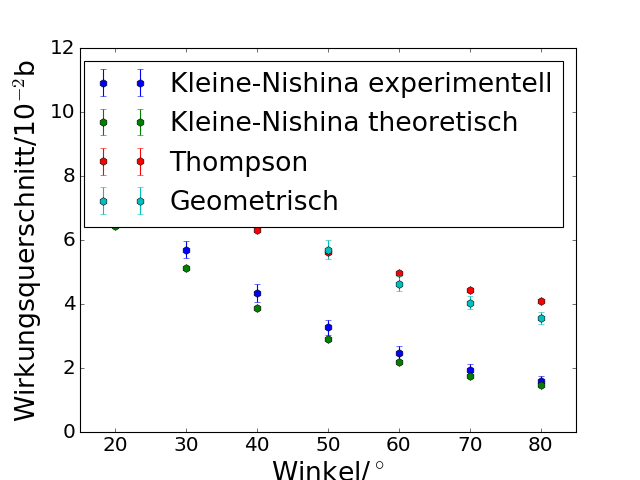

In [144]:
plt.errorbar(list(Wirkungsquerschnitte.Theta),list(Wirkungsquerschnitte.WQ_KN_exp),yerr=list(Wirkungsquerschnitte.error_WQ_KN_exp),label="Kleine-Nishina experimentell" ,fmt=' h', markersize=7)
plt.errorbar(list(Wirkungsquerschnitte.Theta),list(Wirkungsquerschnitte.WQ_KN_th),yerr=list(Wirkungsquerschnitte.error_WQ_KN_th),label="Kleine-Nishina theoretisch" ,fmt=' h', markersize=7)
plt.errorbar(list(Wirkungsquerschnitte.Theta),list(Wirkungsquerschnitte.WQ_Thompson),yerr=list(Wirkungsquerschnitte.error_WQ_Thompson),label="Thompson" ,fmt=' h', markersize=7)
plt.errorbar(list(Wirkungsquerschnitte.Theta),list(Wirkungsquerschnitte.WQ_geom),yerr=list(Wirkungsquerschnitte.error_WQ_geom),label="Geometrisch" ,fmt=' h', markersize=7)
plt.xlabel(r"Winkel/$^\circ$",fontsize=24)
plt.ylabel(r"Wirkungsquerschnitt/10$^{-2}$b",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=24)
plt.xlim([15,85])
plt.show()